In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    explained_variance_score,
    mean_absolute_percentage_error
)

In [2]:
# Load all 3 Excel files
df1 = pd.read_excel(r"C:\Users\HP\Amazon_CleanedPants_Products.xlsx")
df2 = pd.read_excel(r"C:\Users\HP\Amazon_CleanedShoes_Products.xlsx")
df3 = pd.read_excel(r"C:\Users\HP\Amazon_CleanedShirts_Products.xlsx")

# Combine them
merged_df = pd.concat([df1, df2, df3], ignore_index=True)

# Optional: Add a column to indicate source (useful for filtering later)
# df1['Category'] = 'Pants'
# df2['Category'] = 'Shoes'
# df3['Category'] = 'Shirts'

# Save to a new Excel file
merged_df.to_excel("Amazon_All_Products_file.xlsx", index=False)

print("✅ Merged file saved as 'Amazon_All_Products.xlsx'")

✅ Merged file saved as 'Amazon_All_Products.xlsx'


In [3]:
df = pd.read_excel(r"C:\Users\HP\Amazon_All_Products_file.xlsx")

In [4]:
df.head(5)

,Brand,Price,MRP,Review,Product Description,Rating,Delivery in Days,Discount (%)
0,Symbol Premium,1849.0,3999,221,Men's Slim Fit Stretch Knit Pants - Smart Cas...,4.1,3,53.76
1,Symbol Premium,1899.0,3999,638,Men's Slim Fit Flexi Waist Casual Pants | Str...,4.0,3,52.51
2,GRECIILOOKS,499.0,1999,553,Men's Loose Mid Rise Track Pant,4.0,3,75.04
3,GRECIILOOKS,499.0,1999,2082,Trouser Pant for Men | Loose Fit Man Track Pa...,3.8,3,75.04
4,Lymio,799.0,4999,1823,Reguler Fit Cotton Cargo Pants for Men (Cargo-...,3.6,3,84.02


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1242 entries, 0 to 1241
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                1242 non-null   object 
 1   Price                1242 non-null   float64
 2   MRP                  1242 non-null   int64  
 3   Review               1242 non-null   int64  
 4   Product Description  1242 non-null   object 
 5   Rating               1242 non-null   float64
 6   Delivery in Days     1242 non-null   int64  
 7   Discount (%)         1242 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 77.8+ KB


In [6]:
df.describe()

,Price,MRP,Review,Rating,Delivery in Days,Discount (%)
count,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000
mean,996.306248,2499.542673,1678.623188,3.887520,3.139291,56.821296
std,555.309455,1205.122481,6165.959030,0.463613,1.240241,18.001851
min,298.000000,499.000000,1.000000,1.000000,1.000000,2.640000
25%,599.000000,1599.000000,44.000000,3.700000,3.000000,45.022500
50%,839.500000,2274.000000,221.000000,3.900000,3.000000,56.190000
75%,1247.000000,2999.000000,897.000000,4.100000,3.000000,71.687500
max,6102.000000,8495.000000,104127.000000,5.000000,15.000000,91.020000


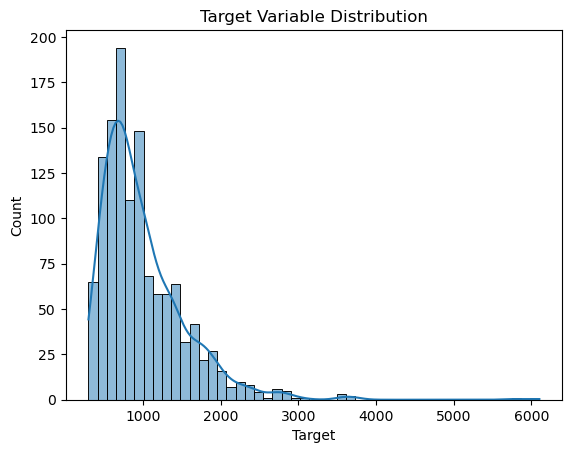

In [7]:
sns.histplot(df['Price'], kde=True)
plt.title("Target Variable Distribution")
plt.xlabel("Price")
plt.show()

In [ ]:


# Train Linear Regression on log target
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y_log)

# Predict and inverse transform
y_log_pred = model.predict(X)
y_pred = np.expm1(y_log_pred)  # Reverse log1p

# Now evaluate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)
mape = np.mean(np.abs((y - y_pred) / y)) * 100

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"MAPE: {mape:.2f}%")

In [ ]:
# Split into features (X) and target (y)
X = df.drop(columns = ['Product Description','Brand','Price'],axis=1)
y_log = np.log1p(df['Price'])  # log(1 + y)

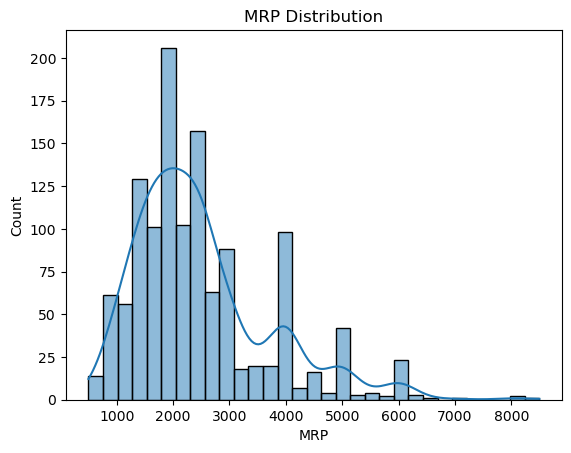

In [8]:
# Histogram
sns.histplot(df['MRP'], kde=True)
plt.title("MRP Distribution")
plt.xlabel("MRP")
plt.show()

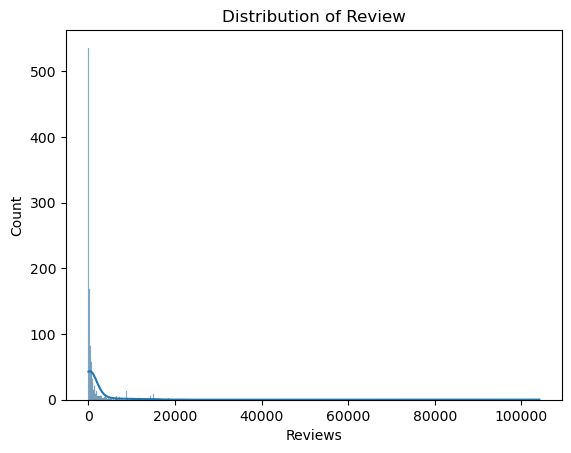

In [10]:
# Histogram
sns.histplot(df['Review'], kde=True)
plt.title("Distribution of Review")
plt.xlabel("Reviews")
plt.show()

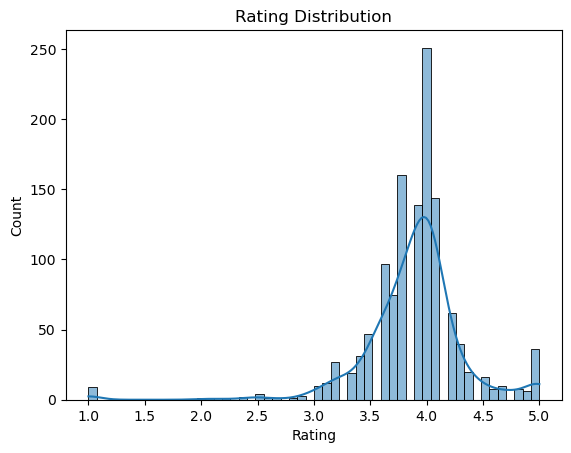

In [11]:
# Histogram
sns.histplot(df['Rating'], kde=True)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.show()

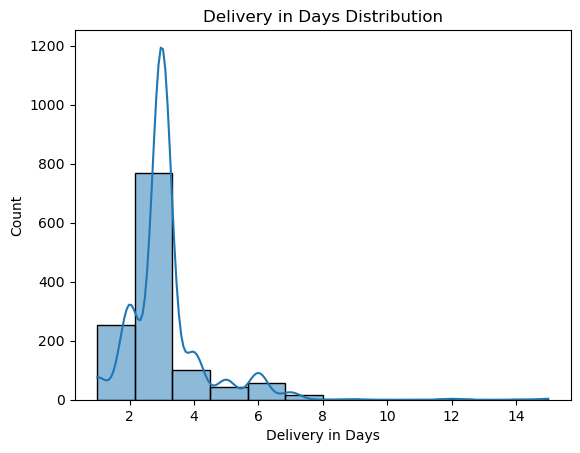

In [12]:
# Histogram
sns.histplot(df['Delivery in Days'], kde=True)
plt.title("Delivery in Days Distribution")
plt.xlabel("Delivery in Days")
plt.show()

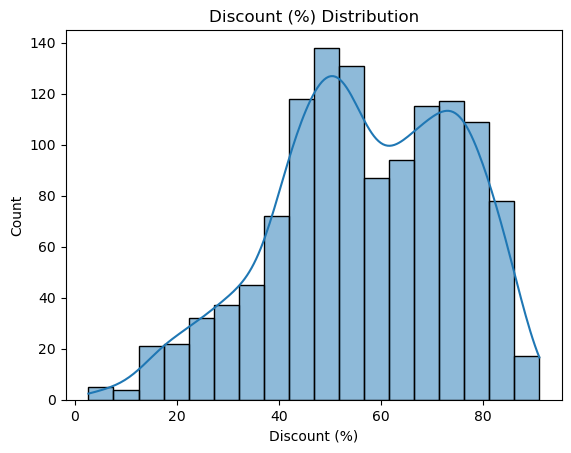

In [13]:
# Histogram
sns.histplot(df['Discount (%)'], kde=True)
plt.title("Discount (%) Distribution")
plt.xlabel("Discount (%)")
plt.show()

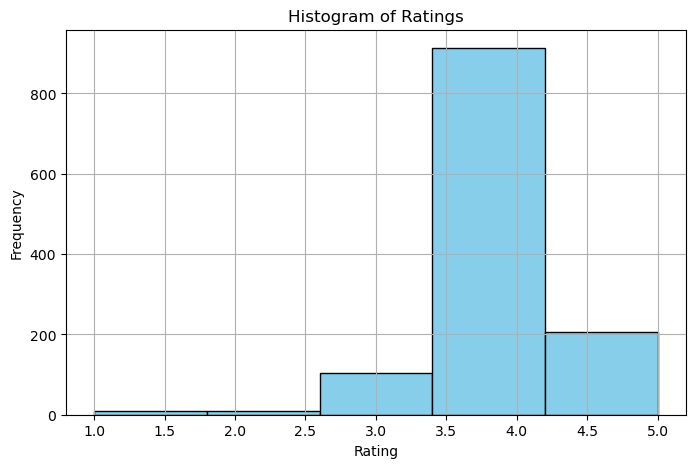

In [21]:
# Plot histogram
plt.figure(figsize=(8,5))
plt.hist(df['Rating'], bins=5, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Ratings')
plt.grid(True)
plt.show()

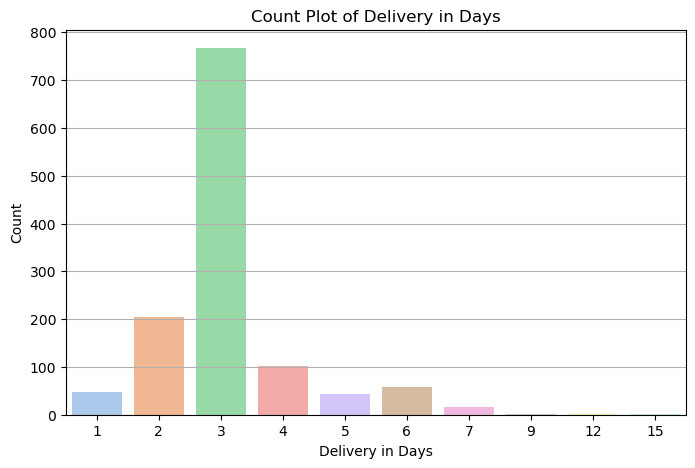

In [22]:
plt.figure(figsize=(8,5))
sns.countplot(x='Delivery in Days', hue='Delivery in Days', data=df, palette='pastel', legend=False)

plt.xlabel('Delivery in Days')
plt.ylabel('Count')
plt.title('Count Plot of Delivery in Days')
plt.grid(axis='y')
plt.show()

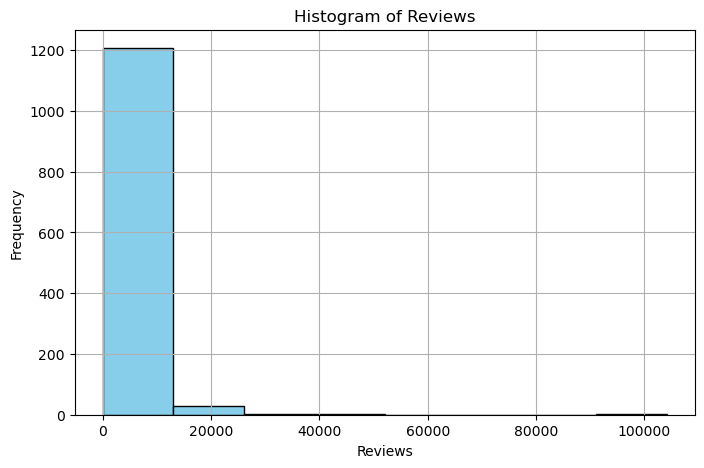

In [23]:
# Plot histogram
plt.figure(figsize=(8,5))
plt.hist(df['Review'], bins=8, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Reviews')
plt.ylabel('Frequency')
plt.title('Histogram of Reviews')
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

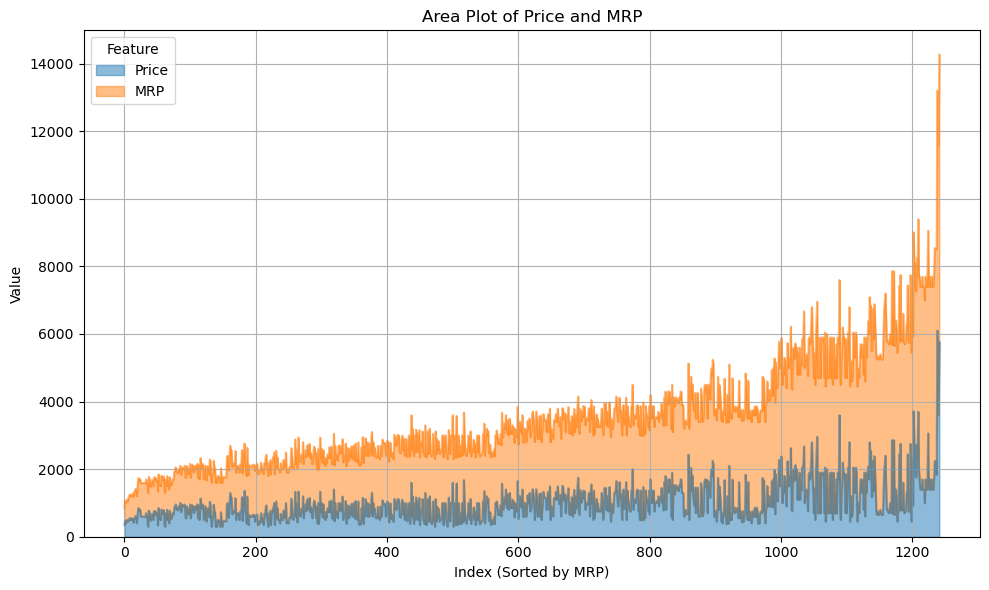

In [24]:
# Sort by index or another relevant column for a smooth area plot
df_sorted = df[['Price', 'MRP']].sort_values(by='MRP', ascending=True).reset_index(drop=True)

# Plot
plt.figure(figsize=(10,6))
df_sorted.plot.area(alpha=0.5, figsize=(10,6), color=['#1f77b4', '#ff7f0e'])  # darkish blue and orange

plt.title('Area Plot of Price and MRP')
plt.xlabel('Index (Sorted by MRP)')
plt.ylabel('Value')
plt.legend(title='Feature')
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
model =  XGBRegressor()

In [26]:
# Split into features (X) and target (y)
X = df.drop(columns = ['Product Description','Brand','Price'],axis=1)
y = df['Price']

In [27]:
print(X.shape)

(1242, 5)


In [28]:
print(y.shape)

(1242,)


In [29]:
# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [30]:
# Fit the model
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [33]:
# Make predictions
y_pred = model.predict(X_test)

# Compute metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100  # To get percentage

# Print results
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Explained Variance: {explained_var:.2f}")
print(f"MAPE: {mape:.2f}%")

MAE: 24.80
MSE: 4763.65
RMSE: 69.02
R² Score: 0.98
Explained Variance: 0.98
MAPE: 2.11%


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [34]:
input_data = (3999,221,4.1,3,53.76)

input_data_as_np_array = np.asarray(input_data)
input_data_reshape = input_data_as_np_array.reshape(1,-1)
prediction = model.predict(input_data_reshape)

print(prediction)

[1848.2168]


In [35]:
regressor = LinearRegression()

In [36]:
# Fit the model
regressor.fit(X_train, y_train)

LinearRegression()

In [37]:
# Make predictions
y_pred = regressor.predict(X_test)

# Compute metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100  # To get percentage

# Print results
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Explained Variance: {explained_var:.2f}")
print(f"MAPE: {mape:.2f}%")

MAE: 163.05
MSE: 54864.70
RMSE: 234.23
R² Score: 0.81
Explained Variance: 0.82
MAPE: 19.99%


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [25]:
input_data = (3999,221,4.1,3,53.76)

input_data_as_np_array = np.asarray(input_data)
input_data_reshape = input_data_as_np_array.reshape(1,-1)
prediction = regressor.predict(input_data_reshape)

print(prediction)

[1672.22399463]


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [39]:
rf_model = RandomForestRegressor(random_state=42)

In [40]:
# Fit the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [41]:
# Make predictions
y_pred = rf_model.predict(X_test)

# Compute metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100  # To get percentage

# Print results
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Explained Variance: {explained_var:.2f}")
print(f"MAPE: {mape:.2f}%")

MAE: 30.13
MSE: 8186.18
RMSE: 90.48
R² Score: 0.97
Explained Variance: 0.97
MAPE: 2.54%


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [29]:
input_data = (3999,221,4.1,3,53.76)

input_data_as_np_array = np.asarray(input_data)
input_data_reshape = input_data_as_np_array.reshape(1,-1)
prediction = rf_model.predict(input_data_reshape)

print(prediction)

[1849.]


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [42]:
gb_model = GradientBoostingRegressor(random_state=42)

In [43]:
# Fit the model
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [44]:
# Make predictions
y_pred = gb_model.predict(X_test)

# Compute metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100  # To get percentage

# Print results
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Explained Variance: {explained_var:.2f}")
print(f"MAPE: {mape:.2f}%")

MAE: 34.22
MSE: 3670.43
RMSE: 60.58
R² Score: 0.99
Explained Variance: 0.99
MAPE: 3.44%


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [34]:
input_data = (3999,221,4.1,3,53.76)

input_data_as_np_array = np.asarray(input_data)
input_data_reshape = input_data_as_np_array.reshape(1,-1)
prediction =gb_model.predict(input_data_reshape)

print(prediction)

[1868.43859837]


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [45]:
lgb_model = lgb.LGBMRegressor(random_state=42)

In [46]:
# Fit the model
lgb_model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000521 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 597
[LightGBM] [Info] Number of data points in the train set: 993, number of used features: 5
[LightGBM] [Info] Start training from score 994.097744


LGBMRegressor(random_state=42)

In [47]:
# Make predictions
y_pred = lgb_model.predict(X_test)

# Compute metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100  # To get percentage

# Print results
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Explained Variance: {explained_var:.2f}")
print(f"MAPE: {mape:.2f}%")

MAE: 32.08
MSE: 4376.91
RMSE: 66.16
R² Score: 0.99
Explained Variance: 0.99
MAPE: 3.24%


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [38]:
input_data = (3999,221,4.1,3,53.76)

input_data_as_np_array = np.asarray(input_data)
input_data_reshape = input_data_as_np_array.reshape(1,-1)
prediction = lgb_model.predict(input_data_reshape)

print(prediction)

[1853.45350969]
